Differences-in-Differences and Regression Discontinuity
===
* data sets
    * DiD - traffic
    * RD - UI_AER_2017

## 1. Differences-in-Differences
* We use the same data set in "Panel Regression" with minor adjustments.
* 2 periods: year = 90 or year = 85.
* treatment: open = 1, 0.

In [12]:
insheet using "/Users/tino/Desktop/TA-Econometrics-II/datasets/0528/traffic.csv", clear
sum


(3 vars, 102 obs)


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
        year |        102        87.5    2.512346         85         90
        open |        102    .4019608    .4927153          0          1
      dthrte |        102    2.427451    .6217441        1.3        4.4


In [13]:
// generate a dummy variable: time = 1 if year = 90, = 0 if year = 85.
gen time = (year == 90)
tab time




       time |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |         51       50.00       50.00
          1 |         51       50.00      100.00
------------+-----------------------------------
      Total |        102      100.00


In [14]:
// generate a interaction term, whose coefficient is DiD estimator.
gen did = time * open

In [6]:
reg dthrte did open time

// DiD estimator = 0.28

// Note that this is just a demostration of how to practice DiD.
// The coefficient in here doesn't reflect the real world since there might be a violation of regression assumption.


      Source |       SS           df       MS      Number of obs   =       102
-------------+----------------------------------   F(3, 98)        =      8.64
       Model |  8.16474844         3  2.72158281   Prob > F        =    0.0000
    Residual |  30.8783898        98   .31508561   R-squared       =    0.2091
-------------+----------------------------------   Adj R-squared   =    0.1849
       Total |  39.0431382       101  .386565725   Root MSE        =    .56132

------------------------------------------------------------------------------
      dthrte |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
         did |   .2810206   .2271937     1.24   0.219    -.1698379    .7318791
        open |   -.209704   .1625727    -1.29   0.200    -.5323242    .1129162
        time |  -.6539871   .1439147    -4.54   0.000    -.9395812    -.368393
       _cons |   2.778125   .0992292    28.00   0.

## 2. Regression Discontinuity
* We use the paper "Nekoei, Arash, and Andrea Weber. 2017. "Does Extending Unemployment Benefits Improve Job Quality?" American Economic Review, 107 (2): 527-61." to demo RD design.
* All relevent resouces (code, data) are in [HERE](https://www.aeaweb.org/articles?id=10.1257/aer.20150528&within%5Btitle%5D=on&within%5Babstract%5D=on&within%5Bauthor%5D=on&journal=&from=a&q=regression+discontinuity&from=j).

In [16]:
insheet using "/Users/tino/Desktop/TA-Econometrics-II/datasets/0528/UI_AER_2017.csv", clear
sum


(6 vars, 1,738,787 obs)


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
         age |  1,738,787    39.71821    5.658388   30.00274   49.99726
        agec |  1,738,787    39.71186    5.655909   30.16667   49.83333
         id0 |  1,738,787    14558.04     8476.87          1      31416
         ay1 |  1,589,178    114.2777    112.7666          1        729
           y |  1,589,178    114.2777    112.7666          1        729
-------------+---------------------------------------------------------
           m |  1,738,787     114.367    5.398304    104.116   124.4285


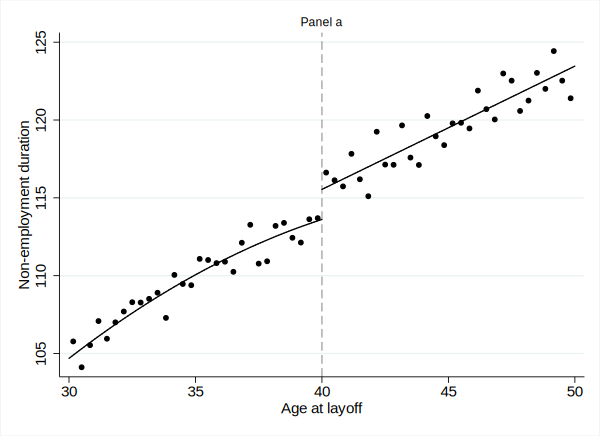

In [17]:
// Graph of RD

local tit = "Non-employment duration"
twoway ///
(scatter m    agec  if   id0==1, mcolor(black) msize(small)) /// 
(qfit    y    age   if   age>=40, lcolor(black) ) ///
(qfit    y    age   if   age<40 , lcolor(black) ) ///
, xline(40, lp(dash) lcolor(gs10)) graphregion(fcolor(white)) legend(off)  ytitle("`tit'") xtitle("Age at layoff") subtitle("Panel a ",size(small) ) name(F3a, replace)

In [18]:
// treatment = 1 if age > 40, = 0 if age <= 40.
gen treatment = (age > 40)

In [19]:
reg y treatment 
// treatment effect = 9.52


      Source |       SS           df       MS      Number of obs   = 1,589,178
-------------+----------------------------------   F(1, 1589176)   =   2828.11
       Model |  35899198.5         1  35899198.5   Prob > F        =    0.0000
    Residual |  2.0173e+10 1,589,176  12693.7171   R-squared       =    0.0018
-------------+----------------------------------   Adj R-squared   =    0.0018
       Total |  2.0208e+10 1,589,177  12716.2989   Root MSE        =    112.67

------------------------------------------------------------------------------
           y |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
   treatment |   9.521316   .1790396    53.18   0.000     9.170404    9.872227
       _cons |   109.7892    .122928   893.12   0.000     109.5483    110.0302
------------------------------------------------------------------------------


In [11]:
reg y treatment if age>=38 & age<=42
// treatment effect around the threshold = 3.20


      Source |       SS           df       MS      Number of obs   =   335,417
-------------+----------------------------------   F(1, 335415)    =     67.25
       Model |  857337.167         1  857337.167   Prob > F        =    0.0000
    Residual |  4.2757e+09   335,415   12747.583   R-squared       =    0.0002
-------------+----------------------------------   Adj R-squared   =    0.0002
       Total |  4.2766e+09   335,416  12750.1011   Root MSE        =    112.91

------------------------------------------------------------------------------
           y |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
   treatment |   3.197656   .3899149     8.20   0.000     2.433434    3.961877
       _cons |    113.073   .2744398   412.01   0.000     112.5351    113.6109
------------------------------------------------------------------------------
